# Deep Learning


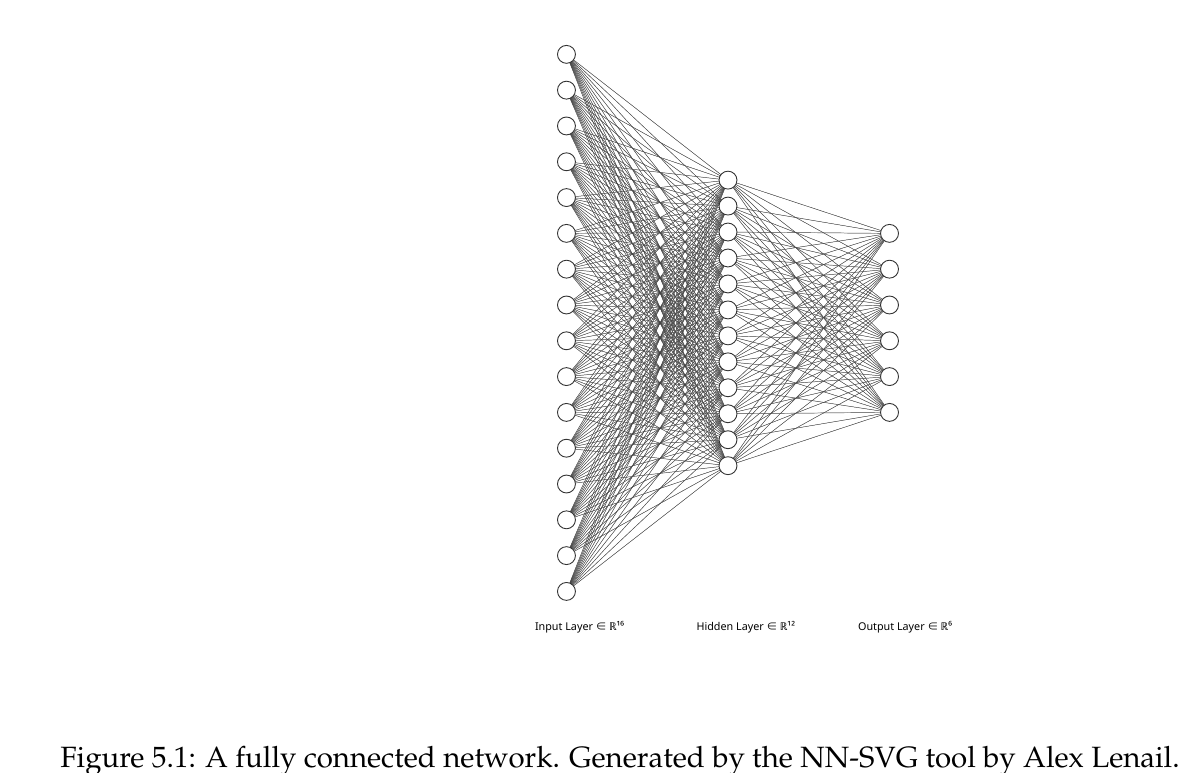

ESta arquitectura (Fig 5.1) es muy comun para MLP:Multi-layer perceptron. Pero es muy costosa. Ademas para redes profundas es impractica. Se invento otros diagramas para ilustrar arquitecturas.



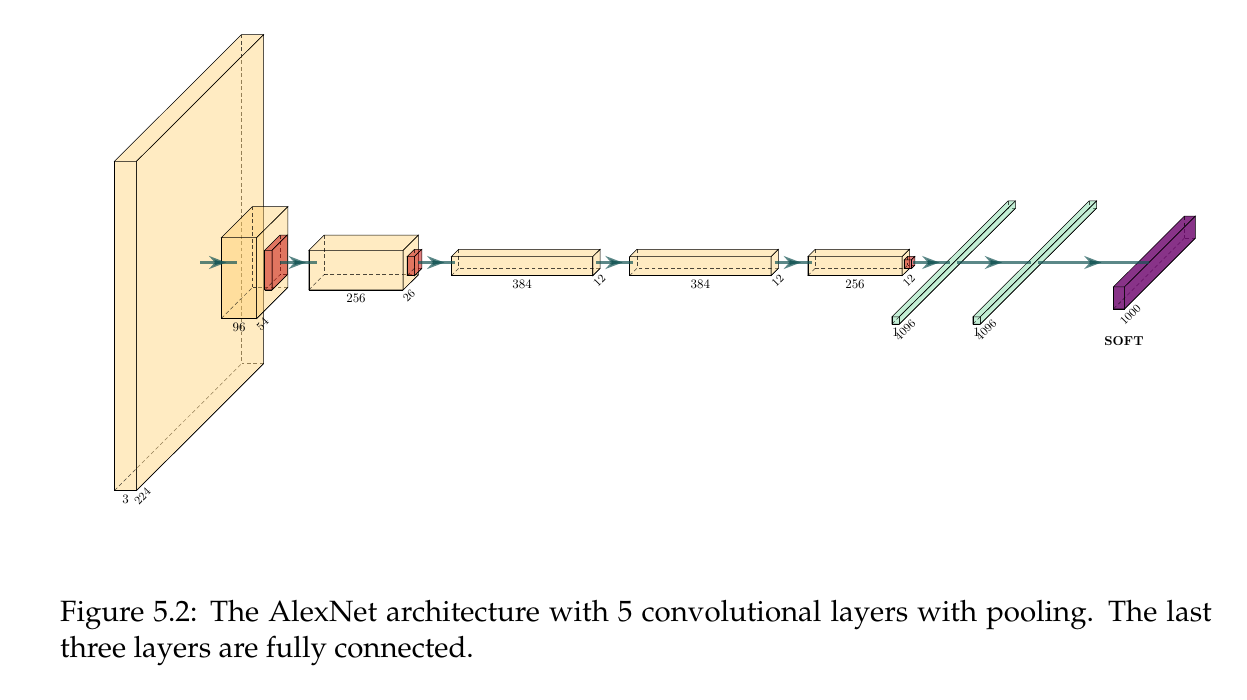

## Convolutional Neural Networks (CNN).
###  Historia:

* En 1980, un Japones (Kunihiko Fukushima) desarrollo lo que llama **Neocognitron**. Este el inicio de las CNN.

* En los 80s, mas tarde Yann LeCun (referencia en las notas)
hizo las primeras implementaciones exitosas en el entrenamiento de imagenes. Yan LeCun es el que maneja la base de datos de MNIST.  A el se la atribuye la LeNet-5 que la veremos en este curso.

### Introduccion:
Se conocen tambien con ConvNets. Se forman a travez de redes de bloques que estudiarmos hoy: convolucion, pooling, fully connected (totalmente conectadas)

La arquitectura de una CNN se describe enseguida.

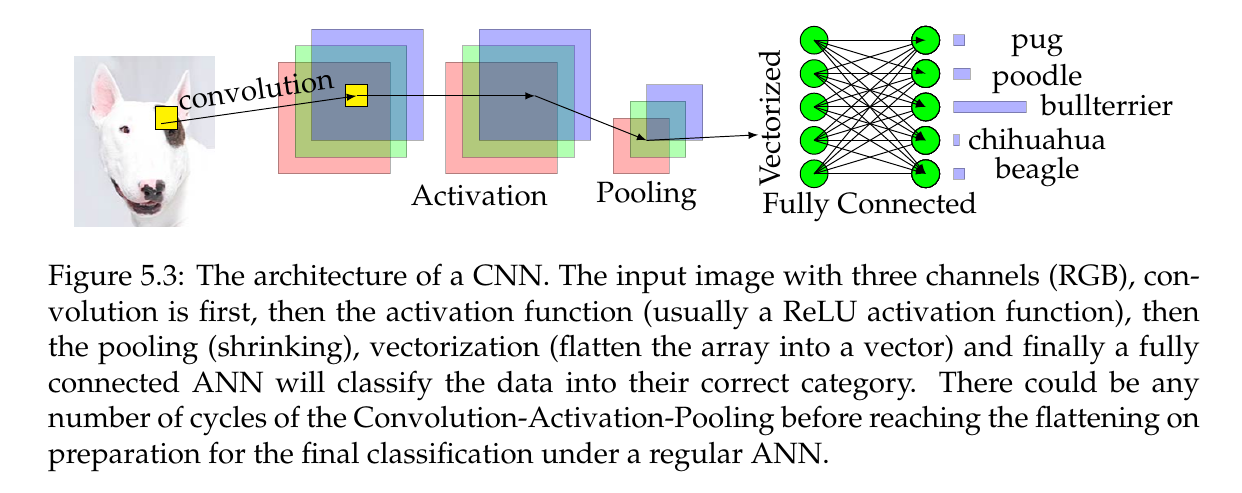

La convolucion funciona por varios factores, pero recuerdo dos importantes.

1. Reduce el tamanho de los  parametros $\Theta$. Esto lo vemos con cierto detalle.
2. La convolucion (correlacion) es optima en el sentido de identificar patrones.

A que me refiero yo cuando digo identificar patrones.
Voy a ilustrar cuatro ejemplos simples.

1. Extraer rayas verticales:

El filtro es de la forma

$$ \begin{pmatrix} 0 & 1 & 0 \\ 0 & 1 & 0  \\ 0 & 1 & 0  \end{pmatrix}  $$

2. Extaer rayas horizontales

$$ \begin{pmatrix} 0 & 0 & 0 \\ 1 & 1 & 1  \\ 0 & 0 & 0  \end{pmatrix}  $$

3. Extraer rayas obliquas con pendiente positiva

$$ \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0  \\ 0 & 0 & 1  \end{pmatrix}  $$

4. Extraer rayas obliquas pendiente negativa

$$ \begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0  \\ 1 & 0 & 0  \end{pmatrix}  $$

Hay un articulo: [convolutional deep belief networks](http://www.cs.toronto.edu/~rgrosse/icml09-cdbn.pdf).



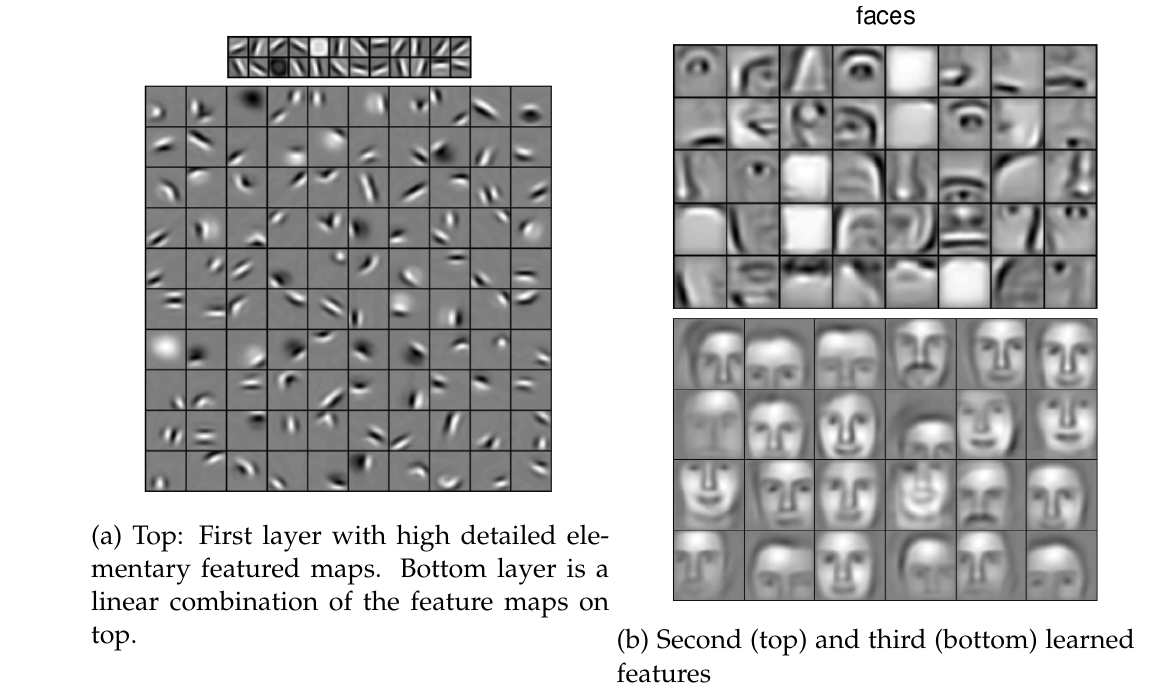

[Convolutional Neural Networks for Visual Recognition](https://cs231n.stanford.edu/2017/)
Esta es un CNN en vivo de Stanford University.

## Arquitectura de las CNN

### Capa convolucional
Recorderis. Ver la siguiente grafica.




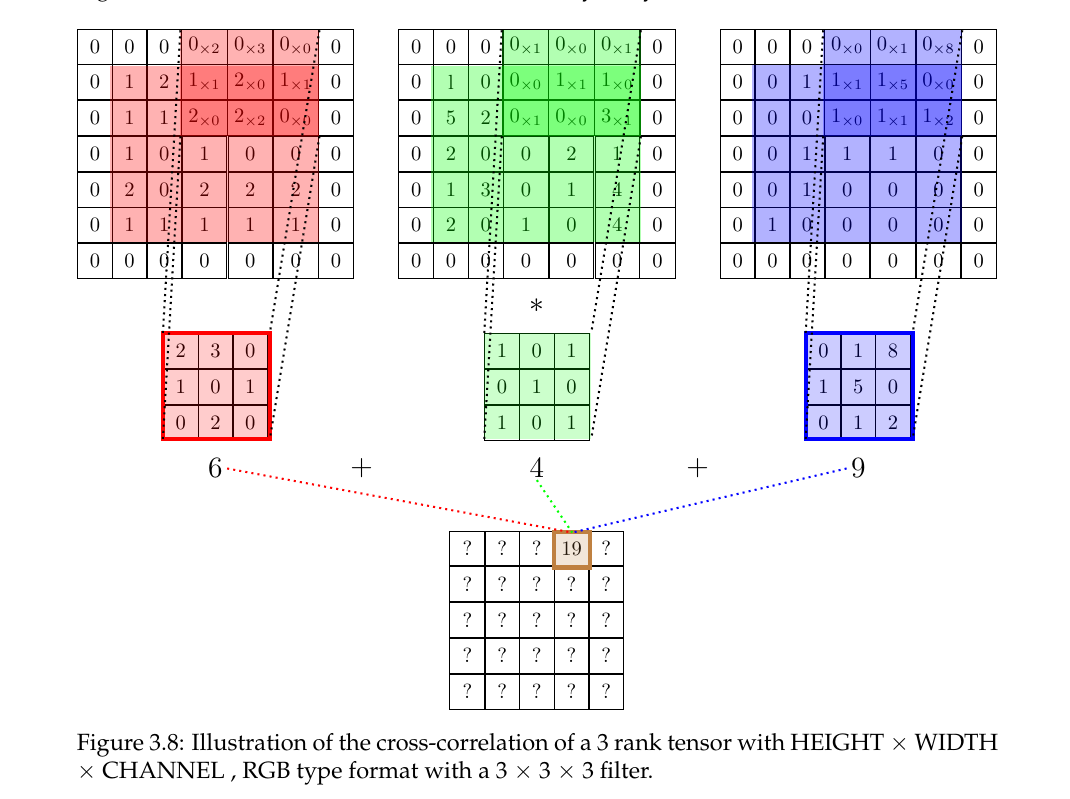

Otra figura que motiva la convolucion es la siguiente

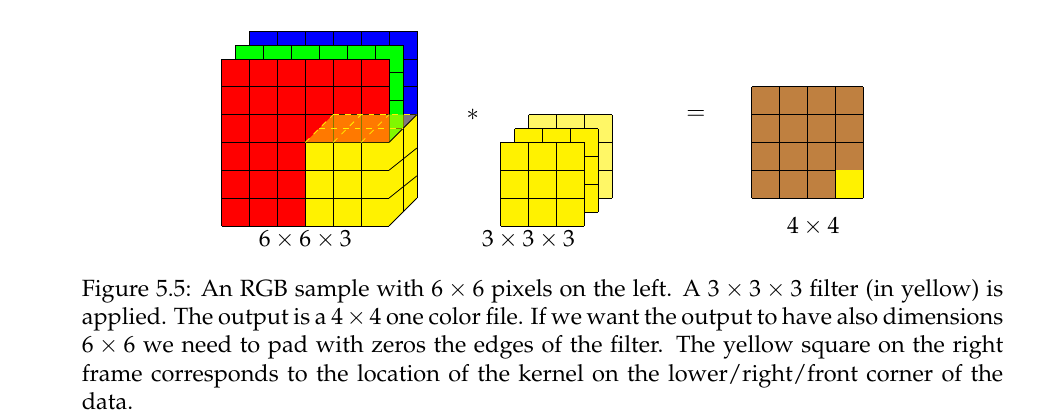

#### Parametros:
Es importante saber contar los parametros por que de esto depende el "tamanho de la red".
Los datos entrada los contamos como

**Datos de entrada**
$$\text{width} \times \text{height} \times \text{depth} $$

**Filtro**
$$\text{cwidth} \times \text{cheight} \times \text{depth} $$

El numero de filtros es otra parte importante del conteo.




La formula para contar es

$$\# \text{params} = (\text{cwidth} \times \text{cheight} \times \text{depth} +1) \times \text{filters} .$$

**Ejemplo 1**: Asumamos que mis datos tiene $24 \times 24$ pixeles. Que tiene 3 canales (depth) y el filtro es de $3 \times 3$.  con 15 filtros. Tenemos, con la notacion definida arriba


\begin{eqnarray}
\text{cwidth} &=& 3 \\
\text{cheight} &=& 3 \\
\text{depth} &=& 3 \\
\text{# params} &=& (3 \times 3 \times 3 + 1) \times 15 = 420
\end{eqnarray}



---



Asumamos que agregamos otra capa con 20 filtros de tamanho $3 \times 3$. Necesitamos


\begin{eqnarray}
\text{cwidth} &= & 3 \\
\text{cheight} &= & 3 \\
\text{depth} &= & 15 \\
\text{filtros} &=& 20 \\
\text{# params} &=& (3 \times 3 \times 15 + 1) \times 20 = 2720.
\end{eqnarray}

Finalmente, agregamos otra capa mas con 5 filtros convolutivos
de tamanho $3 \times 3$

\begin{eqnarray}
\text{cwidth} &= & 3 \\
\text{cheight} &= & 3 \\
\text{depth} &= & 20 \\
\text{filtros} &=& 5 \\
\text{# params} &=& (3 \times 3 \times 20 + 1) \times 5 = 905.
\end{eqnarray}

Vamos  a verificar los calculos usando `TensorFlow` (`Keras`).




In [3]:
# import Keras libraries
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(15, (3, 3), activation='relu', input_shape=(24, 24, 3)))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 15)          │             420 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420 (1.64 KB)

 Trainable params: 420 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.add(layers.Conv2D(20, (3, 3)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 15)          │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 20)          │           2,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,140 (12.27 KB)

 Trainable params: 3,140 (12.27 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# ultima capa
model.add(layers.Conv2D(5, (3, 3)))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 22, 22, 15)          │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 20)          │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 18, 18, 5)           │             905 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,045 (15.80 KB)

 Trainable params: 4,045 (15.80 KB)

 Non-trainable params: 0 (0.00 B)

Recuerden de las clases de convolucion, el numero de elementos de salida en un capa convolutiva

$$\#(z_j) = \frac{N_x - N_y + 2 p}{s} $$
Vamos a verificar estas metricas

$$22 \leftarrow (24 -3)/1 + 1 .$$
$$20 \leftarrow (22 -3)/1 + 1 .$$
$$18 \leftarrow (20 -3)/1 + 1 .$$

### Capa de activacion.
Cada capa puede venir con sus activaciones.

[Funciones de activacion de Keras](https://keras.io/api/layers/activations/#layer-activation-functions).

La mas popular es la ReLU.

### Capa de Pooling (agrupamiento)
El pooling, en su geometria es como una convolucion, pero tiene diferencias notorias las cuales vamos a explicar. Para que?

* El primer objetivo del pooling es reducir tamanho (nodos, calculos, memoria). Esto acelera el proceso
* Puede evitar el "overfitting" (sobreajuste).
* Extrae informacion valiosa de las capas.


Los parametros del pooling no cuentan en el conteo.
El conteo del pooling es como el de la convolucion.
Si tu filtro es $k_x \times k_y$, el tamanho despues de pooling

$$ \text{size after pooling} = [ (n_x - k_x + p_x)/s_x + 1]
\times [(n_y - k_y + p_y)/s + 1.$$
Claramente si $s_x>1$ y $s_y>1$ entonces esto reduce el tamanho de la salida, sustancialmente.

Hay dos tipos de pooling (yo conozco)

* MaxPooling: Busca el maximo dentro de la geometria del fitro.
* AveragePooling: Busca el promedio dentro de la geometria del fitro.







MaxPooling:

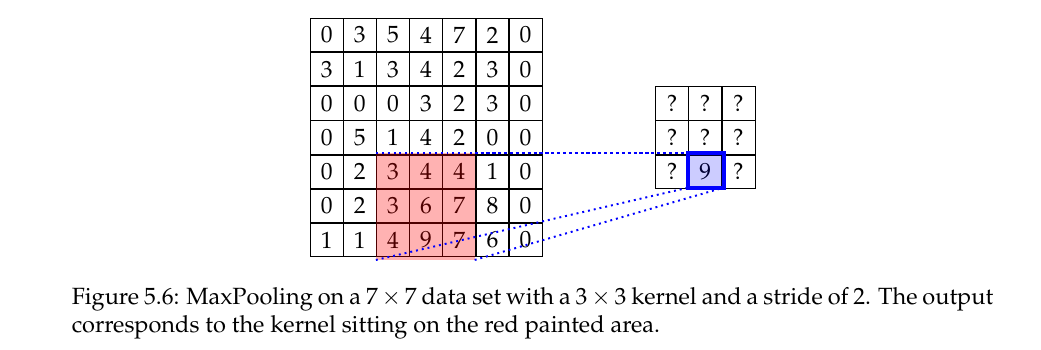

Para el average pooling

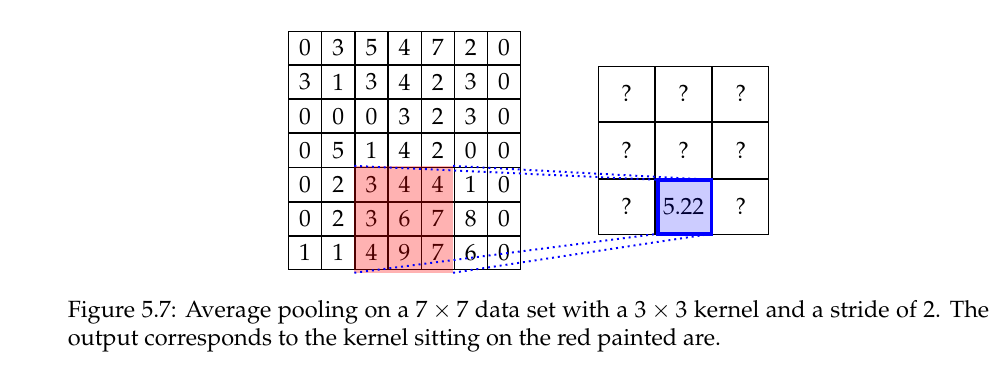



# Proxima clase: fully connected layers....regularizacion (dropout, etc) arquitecturas famosas.